## Performing tasks that Librosa does, without Librosa

### Loading/Reading an Audio Wav file and returning data and sample rate

##### WAV FILE FORMAT : 
The WAV (Waveform Audio File Format) is a popular file format for storing audio on Windows systems. It was developed by Microsoft and IBM. The WAV format is widely used because it is relatively simple and can store uncompressed audio data. Here's a brief overview of the WAV file format:

1. **Header Chunk:**
   - **Chunk ID (4 bytes):** It usually contains the ASCII characters "RIFF" (0x52494646 in hexadecimal).
   - **Chunk Size (4 bytes):** Total size of the file excluding the first 8 bytes (header size). It is little-endian, meaning the least significant byte is stored first.
   - **Format (4 bytes):** It usually contains the ASCII characters "WAVE" (0x57415645 in hexadecimal).

2. **Format Chunk:**
   - **Chunk ID (4 bytes):** It usually contains the ASCII characters "fmt " (0x666D7420 in hexadecimal).
   - **Chunk Size (4 bytes):** Size of the format chunk, which is typically 16 bytes for PCM data.
   - **Audio Format (2 bytes):** Audio format. PCM (Pulse Code Modulation) is the most common and has a value of 1.
   - **Number of Channels (2 bytes):** Number of audio channels (1 for mono, 2 for stereo, etc.).
   - **Sample Rate (4 bytes):** Number of samples per second (in hertz).
   - **Byte Rate (4 bytes):** Data rate in bytes per second. Calculated as Sample Rate * Number of Channels * Bits per Sample / 8.
   - **Block Align (2 bytes):** Number of bytes for one sample, including all channels.
   - **Bits per Sample (2 bytes):** Number of bits in each sample.

3. **Data Chunk:**
   - **Chunk ID (4 bytes):** It usually contains the ASCII characters "data" (0x64617461 in hexadecimal).
   - **Chunk Size (4 bytes):** Size of the data section (number of bytes of audio data).
   - **Audio Data:** Actual audio samples follow this field.

The WAV file format can support various audio formats and compression schemes, but PCM is the most common. PCM is a straightforward method of digitally representing analog signals, where the amplitude of the signal is sampled at regular intervals, and each sample is represented by a binary number. PCM audio is uncompressed and provides a high-quality representation of the original audio signal.

It's important to note that the WAV format can also support compressed audio data using codecs like ADPCM or MP3, but these are less common and not always supported universally across all WAV file readers.

In [37]:
file_name = "./UrbanSound8K/UrbanSound8K/audio/fold5/100032-3-0-0.wav"

In [40]:
with open(file_name, 'rb') as audio_file:
    print(audio_file.read())

b'RIFF\xf4\xda\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data\xd0\xda\x00\x00j\xffl\xff`\xffc\xffi\xffi\xffh\xffe\xff`\xff`\xff[\xff_\xff]\xfff\xffk\xffq\xff}\xff|\xff\x99\xff\x93\xff\xb7\xff\xb3\xff\xd6\xff\xd9\xff\xfa\xff\xfb\xff\x07\x00\x04\x00;\x005\x00P\x00E\x00k\x00b\x00w\x00o\x00\x92\x00\x8c\x00\x98\x00\x96\x00\x9f\x00\xa0\x00\x9e\x00\x9d\x00\x91\x00\x8f\x00\x80\x00~\x00\x82\x00~\x00y\x00v\x00g\x00f\x00R\x00T\x00A\x00B\x001\x005\x00/\x001\x00\x0f\x00\r\x00 \x00\x1b\x00\x12\x00\x0c\x00\t\x00\x05\x00\x10\x00\x13\x00\x10\x00\x1a\x00\x0e\x00\x19\x00\x1d\x00%\x00$\x00\'\x00;\x008\x00O\x00P\x00S\x00T\x00_\x00`\x00[\x00]\x00_\x00c\x00e\x00j\x00g\x00m\x00]\x00b\x00w\x00w\x00j\x00g\x00i\x00e\x00j\x00e\x00M\x00H\x00^\x00^\x00H\x00M\x001\x006\x008\x007\x00\x1f\x00\x1f\x00\x08\x00\r\x00\xf2\xff\xf6\xff\xd9\xff\xdb\xff\xcd\xff\xcd\xff\xbf\xff\xbd\xff\xb0\xff\xad\xff\xb1\xff\xaf\xff\xb4\xff\xb0\xff\xcb\xff\xc0\xff\xd3\xff\xcc\xff\xcb\xff\xcd\x

#### In the above WAV file : 
##### Header Chunk : 
- Chunk ID : "RIFF"
- Chunk Size : "\xf4\xda\x00\x00" -> 419790976
- Format : "WAVE"
- Entire file size : 419790976(Chunk Size) + 4(RIFF) + 4(WAVE) = 419790984

##### Format Chunk
- Chunk ID : "fmt"
- Chunk Size : "10 00 00 00" (16 bytes in decimal)
- Audio Format : 01 00 (PCM Format, little endian)
- Number of Channels : 02 00(2 Channels, Little endian)
- Sample Rate : 44 ac 00 00 (44100 Hz, Little Endian)
- Byte Rate : 10 b1 02 00 ( 176400 bytes per second, Little Endian)
- Block Align : 04 00(4 bytes per sample, little endian)
- Bits per sample : 10 00(16 bits per sample, little-endian)

##### Data Chunk 
- Chunk ID : "data"
- Chunk Size : d0 da 00 00 ( 55824 bytes in little endian)
- data : Hexadecimal values that follow represent the actual audio samples

In [179]:
import struct
import numpy as np
def load_audio(file_path):
    with open(file_path,'rb') as audio_file:
        # Getting the audio file parameters
        # Read the header to get audio file information
        
        header = audio_file.read(44) # In WAV files, first 44 bytes are reserved for the header
        print(f"The header is {header}")
        
        if header[:4] != b'RIFF' or header[8:12] != b'WAVE' or header[12:16] != b'fmt ':
            raise ValueError("Invalid WAV file")
            
        # Extract relevant information from the header
        header_chunk_id = struct.unpack('4s', header[0:4])[0]
        header_chunk_size = struct.unpack('<I', header[4:8])[0]
        header_chunk_format = struct.unpack('4s', header[8:12])[0]
        format_chunk_id = struct.unpack('4s', header[12:16])[0]
        format_chunk_size = struct.unpack('<I', header[16:20])[0]
        format_code = struct.unpack('<H', header[20:22])[0]
        channels = struct.unpack('<H', header[22:24])[0]
        sample_rate = struct.unpack('<I', header[24:28])[0]
        byte_rate = struct.unpack('<I', header[28:32])[0]
        block_align = struct.unpack('<H', header[32:34])[0]
        sample_width = struct.unpack('<H', header[34:36])[0]
        data_chunk_id = struct.unpack('4s', header[36:40])[0]
        data_chunk_size = struct.unpack('<I', header[40:44])[0]
        
        # Read the data from the file
        audio_file.seek(44);
        data = audio_file.read(data_chunk_size)
#         data = audio_file.read()
    
    # Converting the raw binary data to a list of integers : 
    data_array = np.frombuffer(data, dtype=np.int32)
    # Convert to float32
    data_array = data_array.astype(np.float32)
    
    return header_chunk_id, header_chunk_size, header_chunk_format, format_chunk_id, format_chunk_size, data_array, format_code, channels, sample_width, sample_rate, byte_rate, block_align, data_chunk_id, data_chunk_size


In [180]:
file_name = "./UrbanSound8K/UrbanSound8K/audio/fold5/100032-3-0-0.wav"
header_chunk_id , header_chunk_size, header_chunk_format, format_chunk_id, format_chunk_size, audio_data, format_code, channels, sample_width, sample_rate, byte_rate, block_align, data_chunk_id, data_chunk_size = load_audio(file_name)

print("HEADER CHUNK :----- \n")
print(f"Header Chunk ID : {header_chunk_id}")
print(f"Header Chunk Size : {header_chunk_size}")
print(f"Header Chunk Format : {header_chunk_format}")
print("FORMAT CHUNK :----- \n")
print(f"Format Chunk ID : {format_chunk_id}")
print(f"Format Chunk Size : {format_chunk_size}")
print(f"Format Code: {format_code}")
print(f"Number of Channels: {channels}")
print(f"Sample Rate: {sample_rate}")
print(f"Byte Rate : {byte_rate}")
print(f"Block align : {block_align}")
print(f"Sample Width: {sample_width}")
print(f"Number of Samples: {len(audio_data)}")
print("DATA CHUNK :----- \n")
print(f"Data Chunk ID : {data_chunk_id}")
print(f"Data Size : {data_chunk_size}")
print(f"Data : {audio_data}")
print(f"Type of data array : {type(audio_data[0])}")

The header is b'RIFF\xf4\xda\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data\xd0\xda\x00\x00'
HEADER CHUNK :----- 

Header Chunk ID : b'RIFF'
Header Chunk Size : 56052
Header Chunk Format : b'WAVE'
FORMAT CHUNK :----- 

Format Chunk ID : b'fmt '
Format Chunk Size : 16
Format Code: 1
Number of Channels: 2
Sample Rate: 44100
Byte Rate : 176400
Block align : 4
Sample Width: 16
Number of Samples: 14004
DATA CHUNK :----- 

Data Chunk ID : b'data'
Data Size : 56016
Data : [ -9633942. -10223776.  -9830551. ...  -1507347.  -1114126.    -65535.]
Type of data array : <class 'numpy.float32'>


### Amplitude Waves Comparison

C:\Users\Jatin\AppData\Local\Temp\ipykernel_19636\2842997949.py:1: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_data,sr=sample_rate, x_axis = 'time')


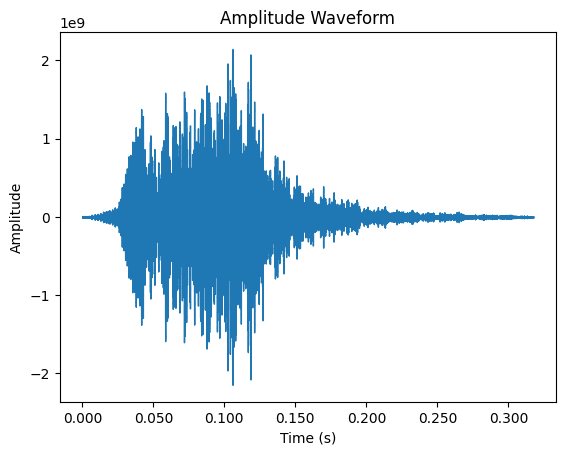

In [181]:
librosa.display.waveshow(audio_data,sr=sample_rate, x_axis = 'time')
plt.subplot(1,1,1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Amplitude Waveform")
plt.show()

C:\Users\Jatin\AppData\Local\Temp\ipykernel_19636\4116798244.py:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(data,sr=sample_rate, x_axis = 'time')


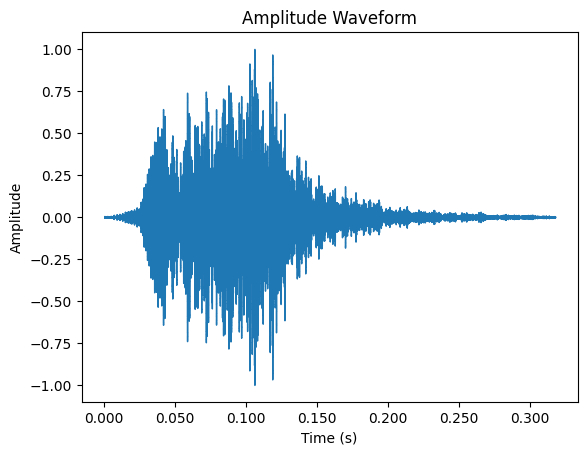

In [182]:
import librosa
data, sample_rate = librosa.load(file_name, sr = 44100)
plt.subplot(1,1,1)
librosa.display.waveshow(data,sr=sample_rate, x_axis = 'time')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Amplitude Waveform")
plt.show()

### Log Mel Spectogram Comparisons

In [163]:
import librosa
# Mel Spectogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Log Mel Spectogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
# log_mel_spectrogram = tf.abs(log_mel_spectrogram)

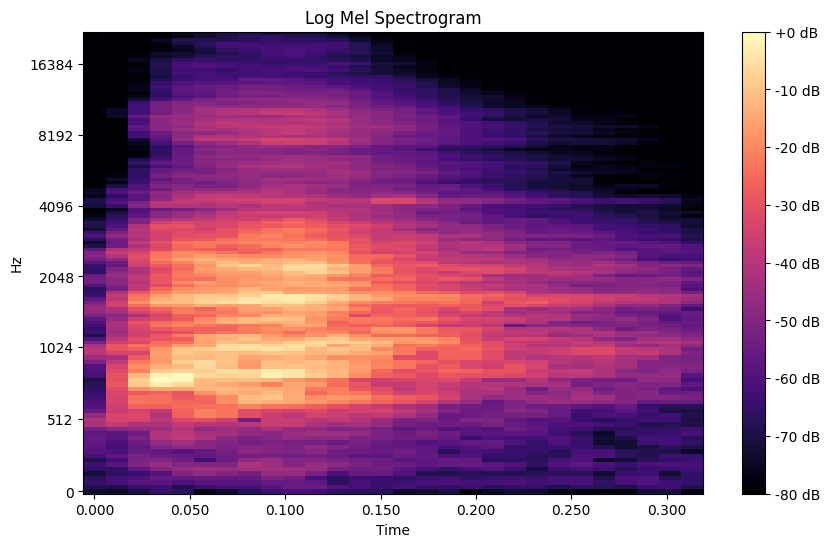

In [164]:
import matplotlib.pyplot as plt
# Visualize the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel Spectrogram')
plt.show()

In [165]:
import librosa
data, sample_rate = librosa.load(file_name, sr = 44100)
# Mel Spectogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate)

# Log Mel Spectogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

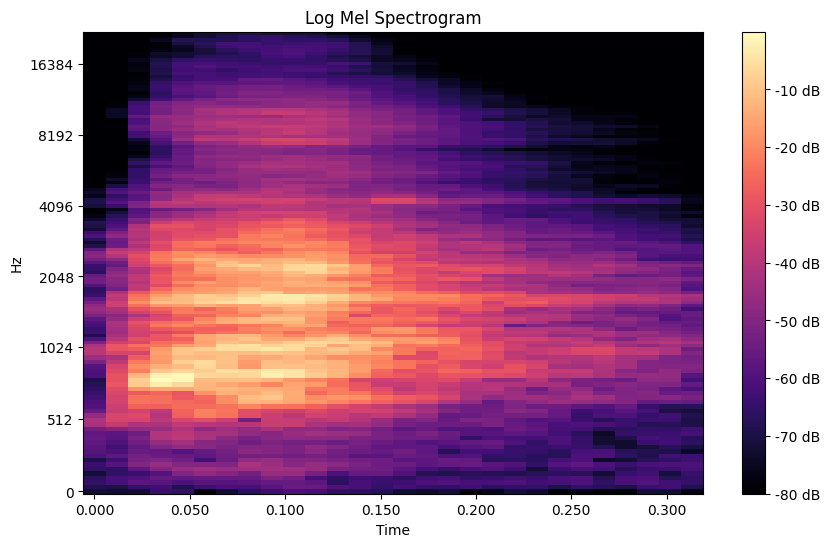

In [166]:
import matplotlib.pyplot as plt
# Visualize the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel Spectrogram')
plt.show()

In [127]:
data
for i in data:
    print(i)

-0.004547119
-0.004837036
-0.0046081543
-0.0046844482
-0.0048828125
-0.0049743652
-0.004837036
-0.0044555664
-0.0040130615
-0.0032348633
-0.0022888184
-0.0012359619
-0.00016784668
0.00016784668
0.0017089844
0.0022735596
0.0031280518
0.0035095215
0.0043640137
0.0046081543
0.0048675537
0.0048065186
0.0043945312
0.0038757324
0.00390625
0.0036468506
0.0031280518
0.002532959
0.0019989014
0.0015563965
0.0014648438
0.0004272461
0.00090026855
0.00045776367
0.00021362305
0.0005340576
0.00064086914
0.0005950928
0.0010070801
0.0011444092
0.0017547607
0.0024261475
0.0025482178
0.0029144287
0.0028076172
0.002960205
0.0031585693
0.0032348633
0.0029144287
0.0036315918
0.003189087
0.0031433105
0.0031585693
0.0022735596
0.0028686523
0.0022735596
0.0015716553
0.0016937256
0.0009460449
0.00032043457
-0.00036621094
-0.001159668
-0.0015563965
-0.0020141602
-0.0024871826
-0.0024414062
-0.002380371
-0.0017852783
-0.0014801025
-0.0015869141
-0.0008392334
-0.0002593994
-0.00035095215
-0.00022888184
4.5776367e-

In [131]:
type(data[0])

numpy.float32

In [130]:
sample_rate

44100